In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

logs = pd.read_csv('websvc_access.csv')
logs.drop('fora', inplace=True, axis=1)

#   
#  ACESSOS POR USUÁRIO

     Usuario  Acessos
0        sis    33581
1  ossclient    29911
2     zabbix     4463
3    netcore       74
4     weboss       68
5          -       39
6      diego       10
7  bkptelnet        3


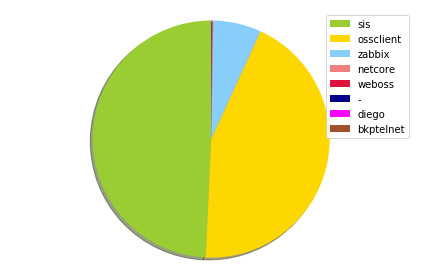

In [2]:
acessos_por_usuario = logs.usuario.value_counts().to_frame().reset_index()
acessos_por_usuario.columns = ['Usuario', 'Acessos']
print(acessos_por_usuario)

labels = acessos_por_usuario['Usuario']
sizes = acessos_por_usuario['Acessos']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','crimson','darkblue','fuchsia','sienna']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

#  
# ACESSOS POR URL

In [3]:
urls = logs.url.value_counts().to_frame().reset_index()
urls.columns = ['url', 'acessos']

#### URLs mais acessadas

In [4]:
print(urls.head())

                                       url  acessos
0                     /oss/gpon/onu_status    12661
1                /oss/gpon/check_device_ip     9183
2                /oss/gpon/omci_onu_status     8200
3   /snmponu/interface_traffic_in_wan/fsan     7306
4  /snmponu/interface_traffic_out_wan/fsan     4856


#### Grafico do acesso às URLs

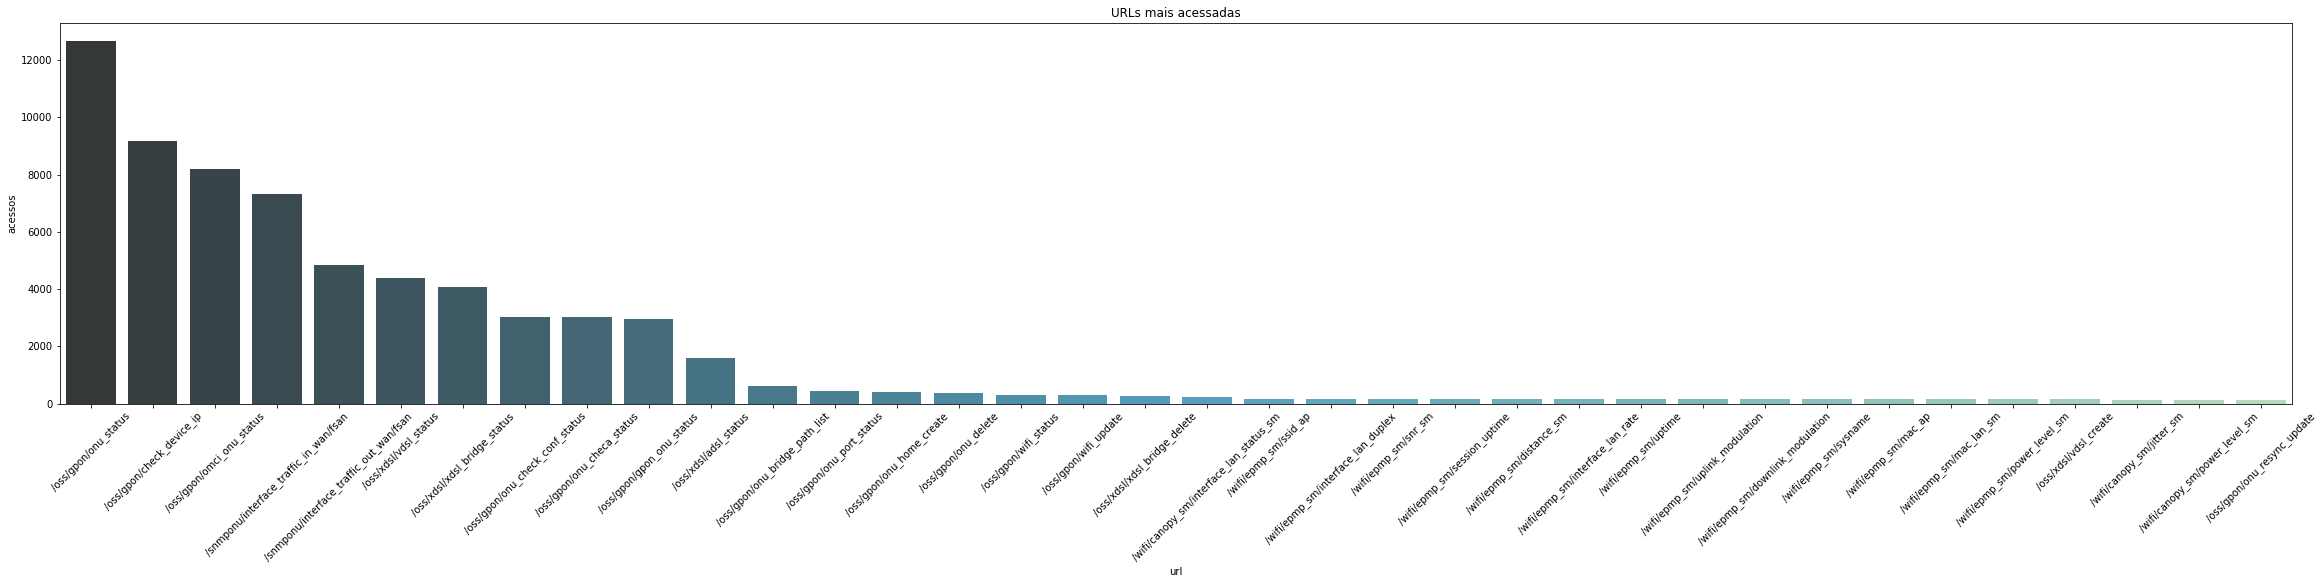

In [5]:
x = urls.loc[(urls['acessos']>=100)].url
y = urls.acessos

plt.figure(figsize=(40,7))
plt.xticks(rotation=45)
plt.title('URLs mais acessadas')
sns.barplot(x=x, y=y, palette='GnBu_d')

#  
# HORÁRIO DOS ACESSOS

In [6]:
pico_de_acesso = logs.datas.value_counts().to_frame().reset_index()
pico_de_acesso.columns = ['Hora', 'Acessos']

#### Momentos com mais acessos

In [7]:
print(pico_de_acesso.head())

                     Hora  Acessos
0  [18/Mar/2019:07:19:42]       37
1  [18/Mar/2019:14:36:32]       17
2  [18/Mar/2019:12:31:58]       15
3  [18/Mar/2019:09:09:13]       13
4  [18/Mar/2019:08:55:52]       13


#### Gráfico entre o período com mais acessos

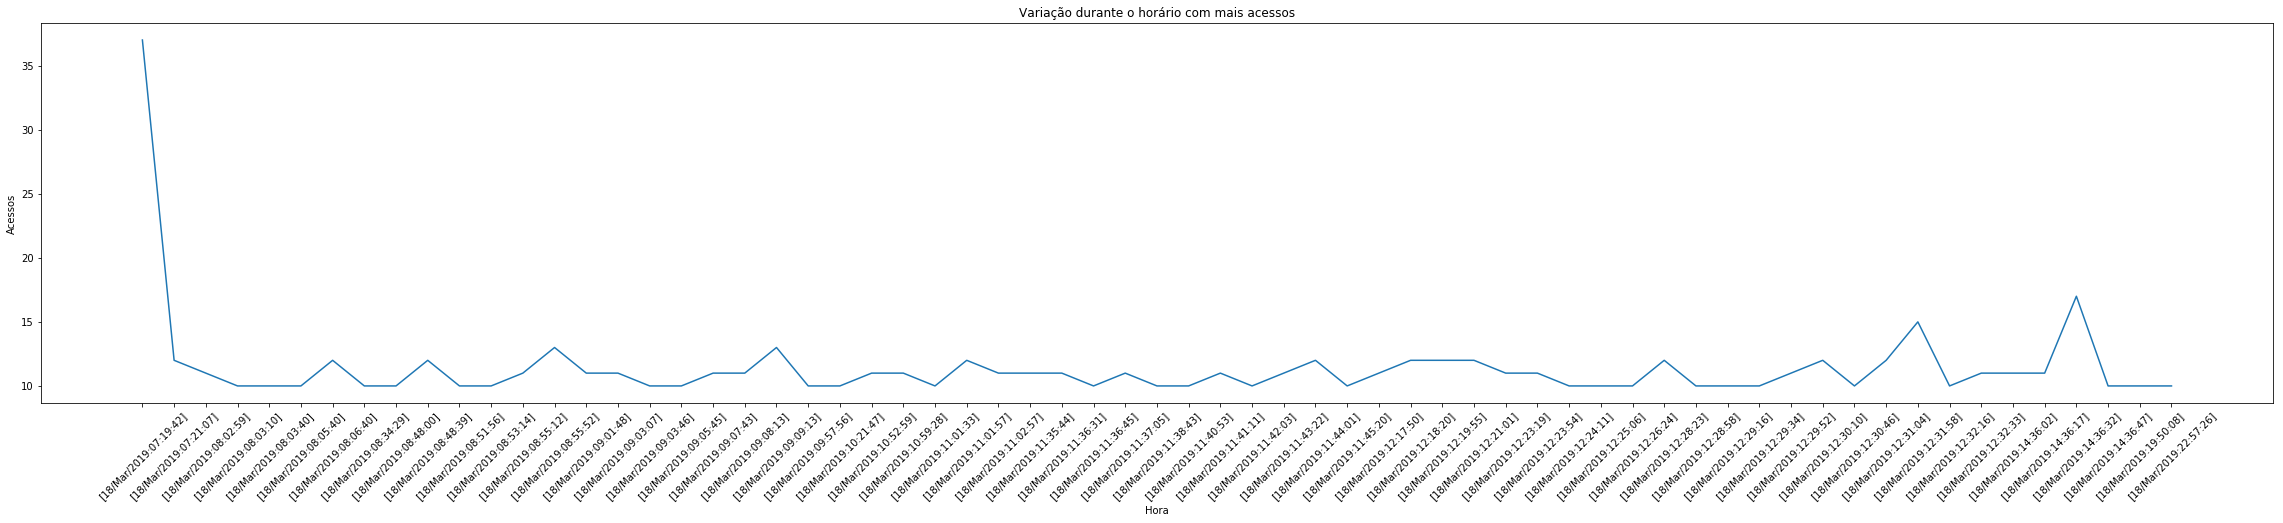

In [8]:
x = pico_de_acesso.loc[(pico_de_acesso['Acessos']>=10)].Hora
y = pico_de_acesso.Acessos

plt.figure(figsize=(40,7))
plt.xticks(rotation=45)
plt.title('Variação durante o horário com mais acessos')
sns.lineplot(x=x, y=y)

#### Gráfico de acessos durante o dia

In [9]:
#Gráfico de acessos entre 6:25 e 6:59
grafico_seis = logs.datas.loc[(logs.datas.index<235)].value_counts().reset_index()
grafico_seis.columns = ['hora', 'acessos']
res_grafico_seis = grafico_seis.acessos.count()

#Gráfico de acessos entre 7:00 e 7:59
grafico_sete = logs.datas.loc[(logs.datas.index<2380)].value_counts().reset_index()
grafico_sete.columns = ['hora', 'acessos']
res_grafico_sete = grafico_sete.acessos.count() - res_grafico_seis

#Gráfico de acessos entre 8:00 e 8:59
grafico_oito = logs.datas.loc[(logs.datas.index<5906)].value_counts().reset_index()
grafico_oito.columns = ['hora', 'acessos']
res_grafico_oito = grafico_oito.acessos.count() - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 9:00 e 9:59
grafico_nove = logs.datas.loc[(logs.datas.index<9821)].value_counts().reset_index()
grafico_nove.columns = ['hora', 'acessos']
res_grafico_nove = grafico_nove.acessos.count() - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 10:00 e 10:59
grafico_dez = logs.datas.loc[(logs.datas.index<16140)].value_counts().reset_index()
grafico_dez.columns = ['hora', 'acessos']
res_grafico_dez = grafico_dez.acessos.count() - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 11:00 e 11:59
grafico_onze = logs.datas.loc[(logs.datas.index<21392)].value_counts().reset_index()
grafico_onze.columns = ['hora', 'acessos']
res_grafico_onze = grafico_onze.acessos.count() - res_grafico_dez - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 12:00 e 12:59
grafico_doze = logs.datas.loc[(logs.datas.index<26538)].value_counts().reset_index()
grafico_doze.columns = ['hora', 'acessos']
res_grafico_doze = grafico_doze.acessos.count() - res_grafico_onze - res_grafico_dez - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 13:00 e 13:59
grafico_treze = logs.datas.loc[(logs.datas.index<30836)].value_counts().reset_index()
grafico_treze.columns = ['hora', 'acessos']
res_grafico_treze = grafico_treze.acessos.count() - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 14:00 e 14:59
grafico_quatorze = logs.datas.loc[(logs.datas.index<35404)].value_counts().reset_index()
grafico_quatorze.columns = ['hora', 'acessos']
res_grafico_quatorze = grafico_quatorze.acessos.count()  - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 15:00 e 15:59
grafico_quinze = logs.datas.loc[(logs.datas.index<39149)].value_counts().reset_index()
grafico_quinze.columns = ['hora', 'acessos']
res_grafico_quinze = grafico_quinze.acessos.count() - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 16:00 e 16:59
grafico_dezesseis = logs.datas.loc[(logs.datas.index<42887)].value_counts().reset_index()
grafico_dezesseis.columns = ['hora', 'acessos']
res_grafico_dezesseis = grafico_dezesseis.acessos.count() - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 17:00 e 17:59
grafico_dezessete = logs.datas.loc[(logs.datas.index<47021)].value_counts().reset_index()
grafico_dezessete.columns = ['hora', 'acessos']
res_grafico_dezessete = grafico_dezessete.acessos.count() - res_grafico_dezesseis - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 18:00 e 18:59
grafico_dezoito = logs.datas.loc[(logs.datas.index<50219)].value_counts().reset_index()
grafico_dezoito.columns = ['hora', 'acessos']
res_grafico_dezoito = grafico_dezoito.acessos.count()  - res_grafico_dezessete - res_grafico_dezesseis - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove  - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 19:00 e 19:59
grafico_dezenove = logs.datas.loc[(logs.datas.index<54423)].value_counts().reset_index()
grafico_dezenove.columns = ['hora', 'acessos']
res_grafico_dezenove = grafico_dezenove.acessos.count() - res_grafico_dezoito - res_grafico_dezessete - res_grafico_dezesseis - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove  - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 20:00 e 20:59
grafico_vinte = logs.datas.loc[(logs.datas.index<59770)].value_counts().reset_index()
grafico_vinte.columns = ['hora', 'acessos']
res_grafico_vinte = grafico_vinte.acessos.count() - res_grafico_dezenove - res_grafico_dezoito - res_grafico_dezessete - res_grafico_dezesseis - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove  - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 21:00 e 21:59
grafico_vinte_um = logs.datas.loc[(logs.datas.index<62883)].value_counts().reset_index()
grafico_vinte_um.columns = ['hora', 'acessos']
res_grafico_vinte_um = grafico_vinte_um.acessos.count() - res_grafico_vinte - res_grafico_dezenove - res_grafico_dezoito - res_grafico_dezessete - res_grafico_dezesseis - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove  - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 22:00 e 22:59
grafico_vinte_dois = logs.datas.loc[(logs.datas.index<64619)].value_counts().reset_index()
grafico_vinte_dois.columns = ['hora', 'acessos']
res_grafico_vinte_dois = grafico_vinte_dois.acessos.count() - res_grafico_vinte_um - res_grafico_vinte - res_grafico_dezenove - res_grafico_dezoito - res_grafico_dezessete - res_grafico_dezesseis - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove  - res_grafico_oito - res_grafico_sete - res_grafico_seis

#Gráfico de acessos entre 22:00 e 23:59
grafico_vinte_tres = logs.datas.loc[(logs.datas.index<65404)].value_counts().reset_index()
grafico_vinte_tres.columns = ['hora', 'acessos']
res_grafico_vinte_tres = grafico_vinte_tres.acessos.count() - res_grafico_vinte_dois - res_grafico_vinte_um - res_grafico_vinte - res_grafico_dezenove - res_grafico_dezoito - res_grafico_dezessete - res_grafico_dezesseis - res_grafico_quinze - res_grafico_quatorze - res_grafico_treze - res_grafico_doze - res_grafico_onze - res_grafico_dez - res_grafico_nove  - res_grafico_oito - res_grafico_sete - res_grafico_seis

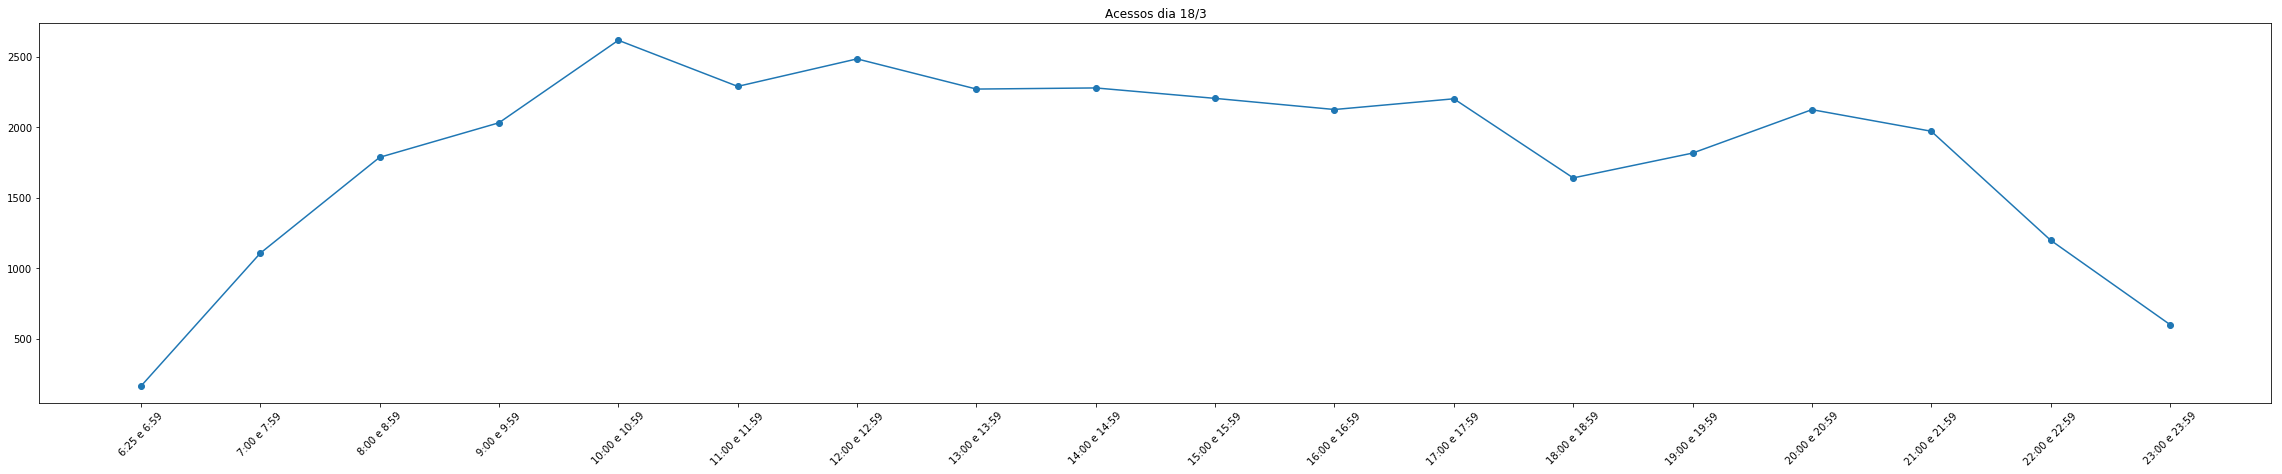

In [11]:
x = np.array(['6:25 e 6:59','7:00 e 7:59','8:00 e 8:59','9:00 e 9:59','10:00 e 10:59','11:00 e 11:59','12:00 e 12:59','13:00 e 13:59','14:00 e 14:59','15:00 e 15:59','16:00 e 16:59','17:00 e 17:59',
     '18:00 e 18:59','19:00 e 19:59','20:00 e 20:59','21:00 e 21:59','22:00 e 22:59','23:00 e 23:59'])
y = np.array([res_grafico_seis, res_grafico_sete, res_grafico_oito, res_grafico_nove, res_grafico_dez, res_grafico_onze, res_grafico_doze, res_grafico_treze, res_grafico_quatorze, res_grafico_quinze, 
res_grafico_dezesseis, res_grafico_dezessete,res_grafico_dezoito, res_grafico_dezenove, res_grafico_vinte, res_grafico_vinte_um, res_grafico_vinte_dois, res_grafico_vinte_tres])

plt.figure(figsize=(40,7))
plt.xticks(rotation=45)
plt.title('Acessos dia 18/3')
plt.plot(x, y, '-o')


#  
# STATUS CODE

   Code  Frequencia
0   200       64643
1   404        1952
2   204         582
3   403          36
4   500          15
5   401           3
6   400           3


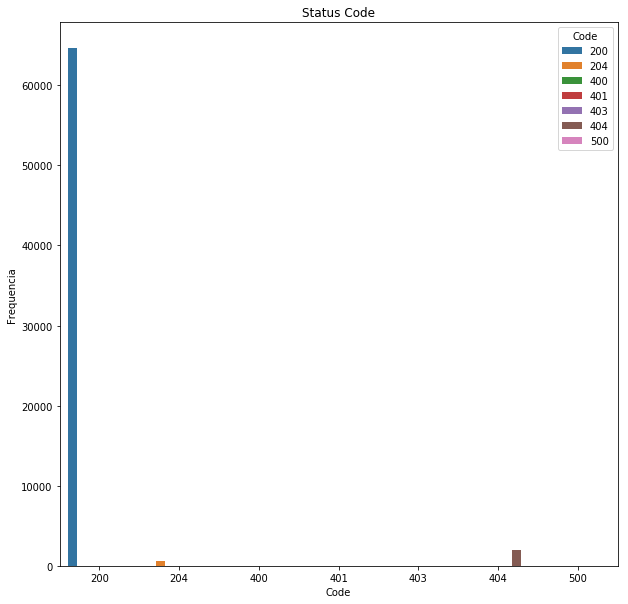

In [13]:
status = logs.status_code.value_counts().to_frame().reset_index()
status.columns = ['Code', 'Frequencia']
print(status.astype(int))
plt.figure(figsize=(10,10))
plt.title('Status Code')
sns.barplot(x=status['Code'].astype(int), y=status['Frequencia'] , hue=status.Code.astype(int))